<a href="https://colab.research.google.com/github/Kaushal-Top5699/classification_NN_tensorflow/blob/main/classification_NN_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Classification with Tensorflow.**
Introduction to Neural Network Classification with **TensorFlow**. In a classification problem you try to classify something as one thing or another.

A few types,
1. Binary Classification
2. Multiclass Classification
3. Multilabel Classification

In [1]:
# Creating sample/toy data.
from sklearn.datasets import make_circles
# Make 1000 exmaples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
# Lets visualise the data.
import pandas as pd
import tensorflow as tf
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


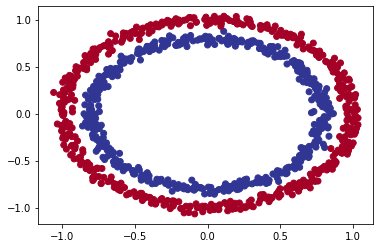

In [6]:
# Visualise with a plot.
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

### **Input and output shapes.**

In [7]:
# Checking the shapes of features and labels.
X.shape, y.shape
# y is scalar therefore, no dimension output here.

((1000, 2), (1000,))

In [10]:
# How many samples we are working with.
len(X), len(y)

(1000, 1000)

In [9]:
# View 1st example features and label.
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### **Building a Model**

In [ ]:
import tensorflow as tf

# Model 1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

In [ ]:
model_1.fit(X, y, epochs = 10, verbose = 0)

In [ ]:
# To improve our model, lets run it for longer.
model_1.fit(X, y, epochs = 200, verbose = 0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

We got an accuracy of just 50%, therefore, let's add an extra layer and up notch the things.

In [ ]:
# Model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

In [ ]:
model_2.fit(X, y, epochs = 10, verbose = 0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5560


[0.6934075951576233, 0.5559999942779541]

Looks like we just got an increment by 1. Lets try ruuning it for more epochs.

In [ ]:
model_2.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932273507118225, 0.5]

### To improve our model we need make some changes namely, adding extra layers, neurons or changing the optimizer.

In [ ]:
# Model 3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_3.fit(X, y, epochs = 100)

In [ ]:
model_3.evaluate(X, y) 

32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939651370048523, 0.5]

In [ ]:
model_3.predict(X)

Now since, we are still getting the same result even after improving our model, its a good idea to visualize the model.

1. Function that takes in trained model's (X) features and (y) labels.
2. Create meshgrid of different X values.
3. Make predictions across meshgrid.
4. Plot the predictions as well as line between zeros(where each unique class falls).


In [11]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the aixs boundaries of the plot and create a meshgrid.
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Create X values.
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
   
  # Make predictions.
  y_pred = model.predict(x_in)

  # Check for multi-class.
  if len(y_pred[0] > 1):
    print("Multi-Class Classification")
    # If so we have to reshape predictions for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("Binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary.
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
plot_decision_boundary(model_3, X = X, y = y)

NameError: ignored

The data above is non-linear which in simple language is non-straight. However, before we fit our model, make sure that the loss function is mae or mse, the above model has a BinaryCrossenrtopy() as loss function.

In [12]:
# Lets see if our model can be used for regression problem.
import tensorflow as tf
tf.random.set_seed(42)

# Create a regression data.
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Splitting data into training and testing.
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
# Re-creating our model 3.
tf.config.run_functions_eagerly(True)
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

In [ ]:
X_reg_train.shape, y_reg_train.shape

(TensorShape([150]), TensorShape([150]))

In [ ]:
# Fitting our model to regression data.
model_4.fit(tf.expand_dims(X_reg_train, axis = 1), y_reg_train, epochs = 100)

In [ ]:
model_4.evaluate(X_reg_train, y_reg_train)

5/5 [==============================] - 0s 11ms/step - loss: 37.3472 - mae: 37.3472


[37.34720230102539, 37.34720230102539]

2/2 [==============================] - 0s 8ms/step


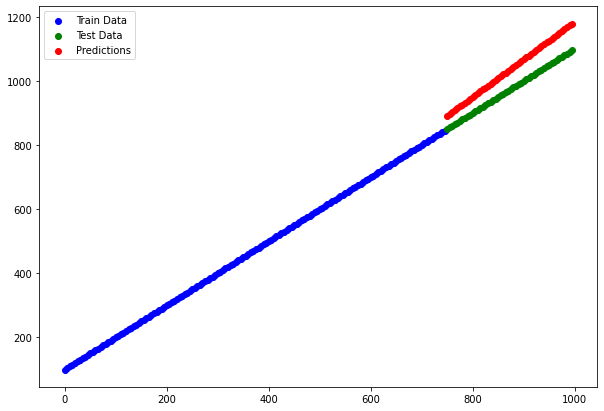

In [ ]:
# Make predictions.
y_reg_pred = model_4.predict(X_reg_test)

# Plot the predictions.
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Train Data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Test Data")
plt.scatter(X_reg_test, y_reg_pred, c = "r", label = "Predictions")
plt.legend()

The missing piece: Non-linearity

In [ ]:
# Setting random seed.
tf.random.set_seed(42)

# 1. Creat model.
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

# 2. compile.
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

In [ ]:
# Fit the model.
history = model_4.fit(X, y, epochs = 100, verbose = 0)

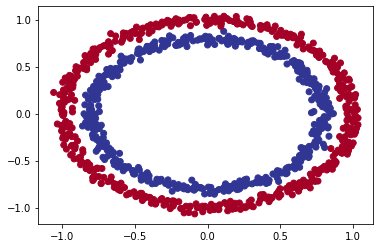

In [ ]:
# Check our data.
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
Multi-Class Classification


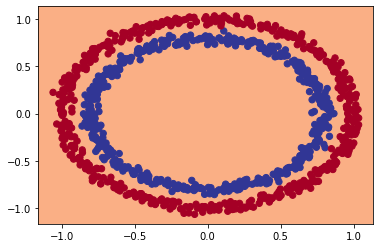

In [ ]:
plot_decision_boundary(model_4, X = X, y = y)

In [ ]:
from keras.layers.attention.multi_head_attention import activation
# Lets trying adding the first non-linear activation "reLU"

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

histroy = model_5.fit(X, y, epochs = 100)

### Still our model is not performing well! Its still not learning and its seems like its just guessing.

In [ ]:
# Lets try increasing the number of units in our hidden layer.
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation = tf.keras.activations.relu)
])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_6.fit(X, y, epochs = 100)

313/313 [==============================] - 1s 2ms/step
Multi-Class Classification


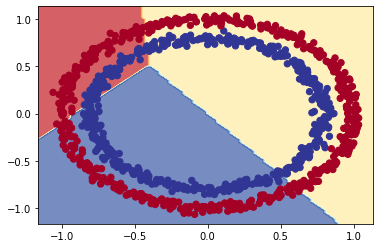

In [ ]:
plot_decision_boundary(model_6, X = X, y = y)

In [ ]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 11ms/step - loss: 1.5522 - accuracy: 0.3390


[1.5522265434265137, 0.33899998664855957]

Looks like our model is improving...
Lets now try adding one more hidden layer with 2 units.

In [ ]:
# Multi-Layer Neural Network.
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

In [ ]:
histroy_2 = model_7.fit(X, y, epochs = 350)

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 14ms/step - loss: 0.0436 - accuracy: 0.9890


[0.04360446333885193, 0.9890000224113464]

313/313 [==============================] - 1s 3ms/step
Multi-Class Classification


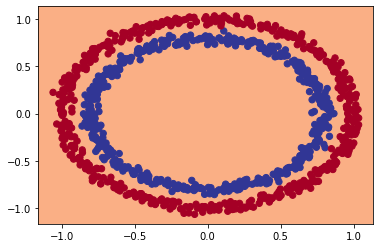

In [ ]:
plot_decision_boundary(model_7, X=X, y=y)

### **It looks like for output layer in Binary Classification we have to use an activaion function called sigmoid. Lets re-build our model with this add-on.**

In [13]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

In [14]:
history = model_8.fit(X, y, epochs = 100, verbose = 0)

In [15]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.9560


[0.33465683460235596, 0.9559999704360962]

### **This is awesome! Just by adding an ouput activation (Sigmoid) we have finally achived an accuracy of 99%. Lets visualize it.**

313/313 [==============================] - 1s 2ms/step
Multi-Class Classification


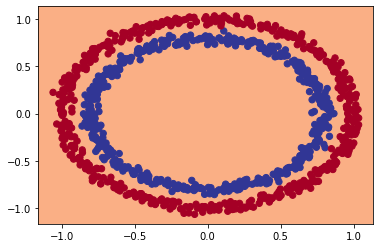

In [16]:
plot_decision_boundary(model_8, X, y)

In [17]:
# The above plot_decision_boundary() function has some as seen above therefore, we re-created it.

import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

## **Perfect seperation!**

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


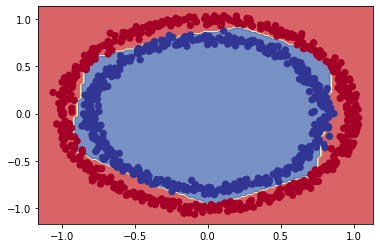

In [18]:
plot_decision_boundary(model_8, X, y)

### Now note that we have trained our model a dataset and big idea over here is that we have tested it on the same data!

In [19]:
# Creating a toy tensor.
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

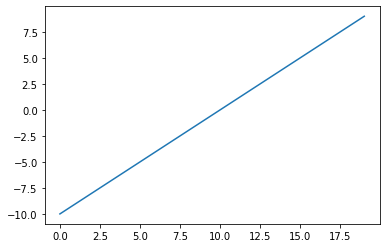

In [20]:
plt.plot(A)

In [21]:
# Lets start replicating sigmoid activation functions -- sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [22]:
# Using sigmoid function on A.
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

Lets check how a sigmoid looks like.

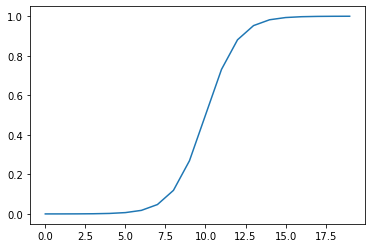

In [23]:
plt.plot(sigmoid(A))

Lets try reLU.

In [24]:
# Let create a relu activation function.
def relu(x):
  return tf.maximum(0, x)

In [25]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

Looks exactly the same as we saw in tensorflow documentation.

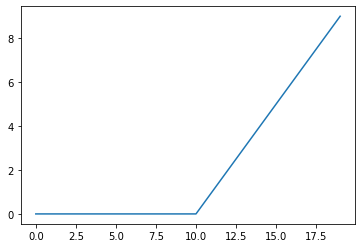

In [26]:
plt.plot(relu(A))

Now, lets try the linear activaion function.

In [27]:
def linear(x):
  return tf.keras.activations.linear(x)

In [28]:
linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

Looks like it returns the same thing.

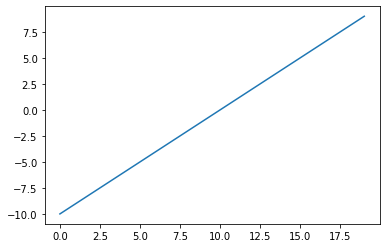

In [29]:
plt.plot(linear(A))

**Remember in our initial experimentations we used linear activation function, we as have visualized it above and looked into tensorflow documentation, now we know that it return the data unmodified. Therefore, we can iterpretate that we this is the resaon why our model was not able to learn the patterns. [TensorFlow/Linear](https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear)**

## **Evaluating and improving our classification model.**

So far we are using the same dataset for training and testing. Now its time to create training and test sets.

In [30]:
import tensorflow as tf

In [31]:
# Lets split the train and test sets by indexing, it's a good idea to use scikit learns train-test-split.
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [32]:
# Creating a model to fit on training data and evaluate on testing data.

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

In [ ]:
# Fitting model_9.
history = model_8.fit(X_train, y_train, epochs = 25)

In [34]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.9800


[0.1008395105600357, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


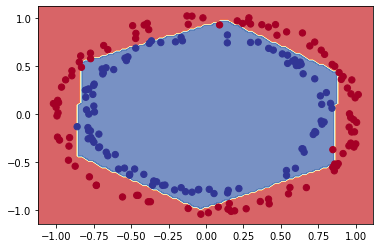

In [35]:
plot_decision_boundary(model_8, X_test, y_test)

**Things look very good now!**

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


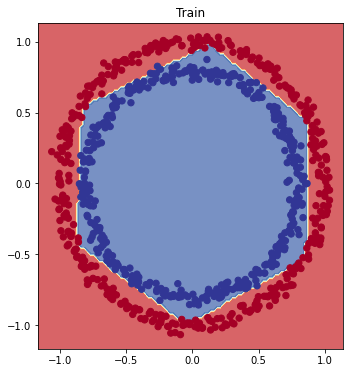

In [36]:
# PLot decision boundaries for thr training and test sets.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.show()

313/313 [==============================] - 0s 2ms/step
doing binary classifcation...


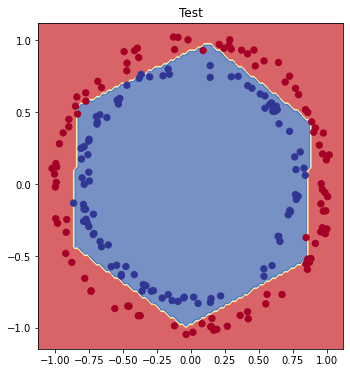

In [37]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or Training) curves.

In [38]:
# Converting history object into a DataFrame.
pd.DataFrame(history.history)

,loss,accuracy
0,0.687971,0.60625
1,0.677329,0.62625
2,0.665432,0.62750
3,0.647289,0.65125
4,0.623593,0.70875
5,0.590867,0.76500
6,0.551616,0.79750
7,0.506746,0.83250
8,0.458873,0.85125
9,0.399743,0.91875


Text(0.5, 1.0, 'model_8 loss curves')

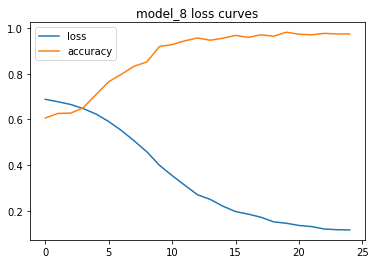

In [39]:
# Plot the loss curve.
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves")

### As you can see in the above visualization, the loss function is decresing and accuracy is increasing. This means our model is making predictions closer to the ground truth.

## **Finding the ideal learning rate.**

To find the ideal learning rate we are going to use the following steps:
1. A learning rate **callback** (Addtional funtionality you can add to your model **while** its training).
2. We need another model.
3. Modified loss curves plot.

In [ ]:
# Model 9
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Before we fit the model, we need to create a learning rate callback.
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model, but this we will be passing lr_scheduler callback.
history_9 = model_9.fit(X_train, y_train, epochs = 100, callbacks = [lr_schedular]) # You can pass as many as callbacks you want.

<Axes: xlabel='epochs'>

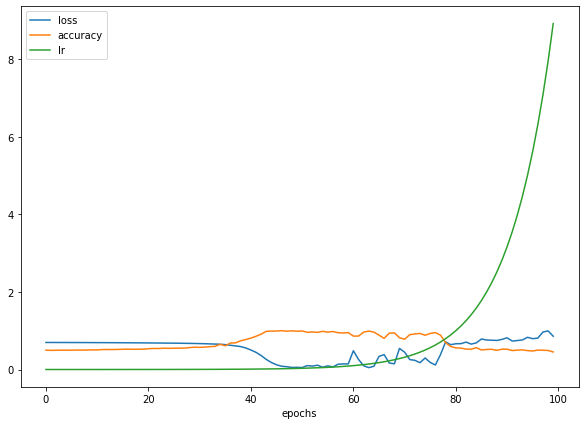

In [41]:
# Lets checkout our history plot.
pd.DataFrame(history_9.history).plot(figsize = (10, 7), xlabel = "epochs")

In [42]:
# Plot the learning rate versus the loss.
lrs = 1e-4 * 10**(tf.range(100)/20)
lrs
# These are the different learing rates our model tried.

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning Rate VS Loss')

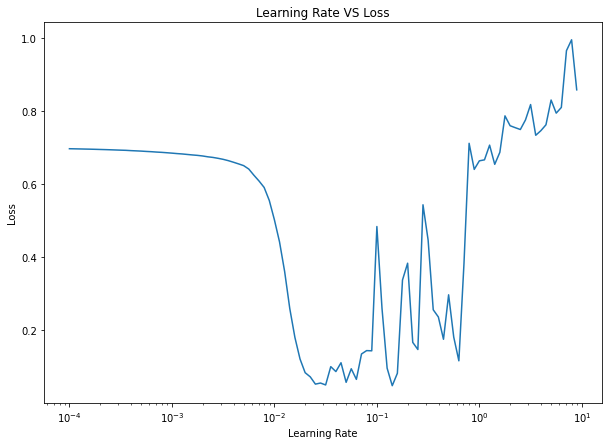

In [43]:
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate VS Loss")

### As you can see the loss goes down around 10^-2 = 0.01, and we if we move even further say two steps and set it ti 0.02 lets see how our model performs.



In [94]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                metrics = ["accuracy"])

In [95]:
history_10 = model_10.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6825 - accuracy: 0.5638
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6338
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.7013
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.8737
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.8687
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.9400
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2370 - accuracy: 0.9700
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1824 - accuracy: 0.9700
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1376 - accuracy: 0.9825
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 0.9962
Epoch 11/25
25/25 [

<Axes: >

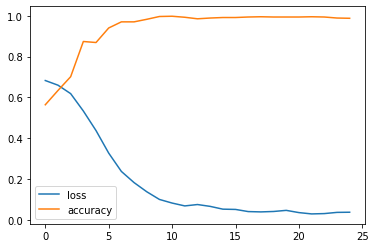

In [96]:
# Lets check the loss curves.
pd.DataFrame(history_10.history).plot()

In [97]:
# Evaluate model_10 on test data.
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9950


[0.03240123763680458, 0.9950000047683716]

In [98]:
# Evaluate model_8 on test data.
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.9800


[0.1008395105600357, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


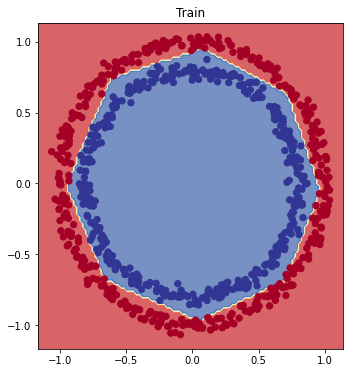

In [99]:
# Plot the decsion boundaries for training and test dataset.
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.show()

313/313 [==============================] - 0s 2ms/step
doing binary classifcation...


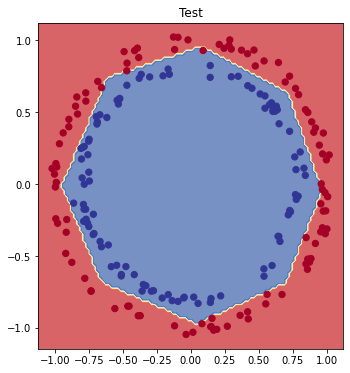

In [100]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

# **More classification evaluation methods**

1. Accuracy
2. Precision - less false positives.
3. Recall - less false negatives.
4. F-1 Score
5. Confusion Metrix
6. Classification report - from scikit-learn.

In [101]:
# Check our model's accuracy and loss.
def loss_accuracy(model):
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f"Model loss : {loss}")
  print(f"Model accuracy : {(accuracy * 100): .2f}%")

In [102]:
loss_accuracy(model_10)

7/7 [==============================] - 0s 4ms/step - loss: 0.0324 - accuracy: 0.9950
Model loss : 0.03240123763680458
Model accuracy :  99.50%


### Creating a Confusion Matrix.

Here, on X axis we have the true labels and on Y axis we have the predicted labels. The result is represented diagonally across the matrix. However, this becomes tedious when working with more classes.



In [45]:
# Creating a confusion matrix.
from sklearn.metrics import confusion_matrix

In [68]:
# Predictions of model_10.
y_preds = model_10.predict(X_test)

# Confusion matrix.
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [104]:
# Looks like our y_test is binary and y_preds are non-binary, therefore, we got this error.
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [105]:
y_preds[:10]

array([[0.8491012 ],
       [0.8491012 ],
       [0.8491012 ],
       [0.8491012 ],
       [0.27996695],
       [0.0043827 ],
       [0.7381222 ],
       [0.06248191],
       [0.8491012 ],
       [0.8491012 ]], dtype=float32)

### The standard output of sigmoid or softmax activation functions is **prediction probability**. We have to convert the these prediction probablities into binary form.

In [106]:
prediction = tf.round(y_preds)
prediction[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

Now that we have converted the predictions into Binary, lets try create a confusion matrix.

In [108]:
confusion_matrix(y_test, prediction)

array([[82, 19],
       [ 0, 99]])

We can make this confusion matrix more prettier.

In [43]:
# Prettifing confusion matrix.
def plot_confusion_matrix(test_labels, pred):
  import itertools
  import numpy as np

  figsize = (7, 7)

  # Create a confusion matrix.
  cm = confusion_matrix(test_labels, pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # Normalize our confusion matrix.
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot.
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Create lables.
  ax.set(title = "Confusion Matrix",
        xlabel = "Prediction Label",
        ylabel = "True Lable",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set x-axis labels to bottom.
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the label size.
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors.
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i, j] > threshold else "black",
            size = 15)

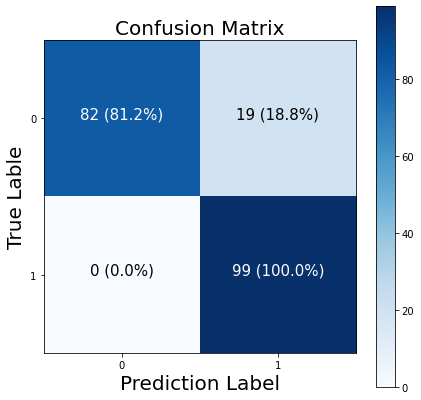

In [111]:
plot_confusion_matrix(prediction)

# **Working with larger example (multiclass-classification).**
More than two classes as option it is called Multiclass Classification Problem. In this example we are going to build a neural network to classify different images of items of clothing. For this example we are going to use TensorFlow Fashion MNIST dataset. [**Fashion mnist**](https://www.tensorflow.org/datasets/catalog/fashion_mnist)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# Data is already sorted into traing and test sets.

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar 30 14:53:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Training samples
print(f"Training Sample: \n{train_data[0]}\n")
print(f"Training Label: \n{train_labels[0]}\n")

Training Sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [4]:
# Check the shape.
train_data[0].shape, train_labels[0].shape

((28, 28), ())

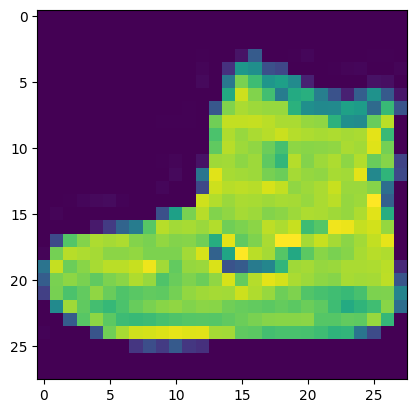

In [5]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [6]:
train_labels[0]

9

In [ ]:
# Creating a small list so we can index onto our training labels so they are human-readable.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

Text(0.5, 1.0, 'T-shirt/top')

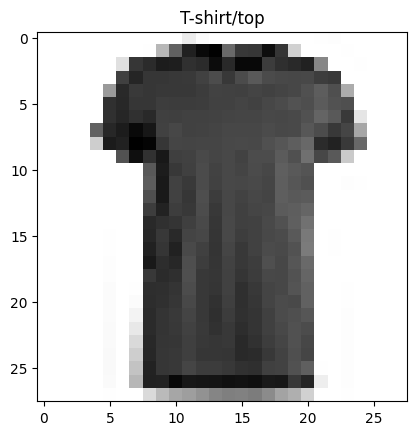

In [8]:
# Plotting an example image.
plt.imshow(train_data[17], cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])

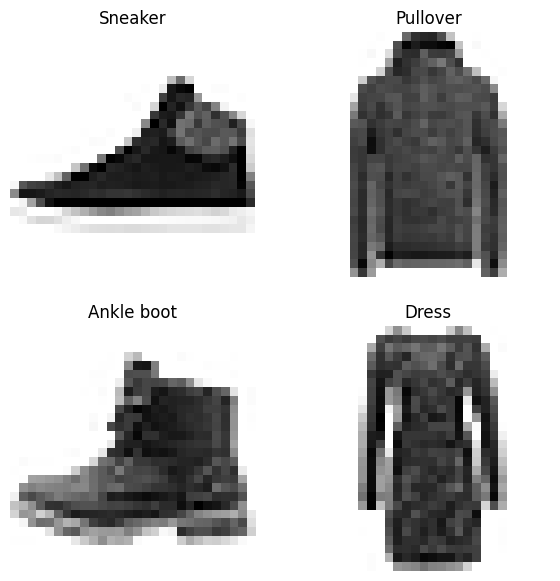

In [9]:
# Plot multiple random images of fashion MNIST.
import random
plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## **Building multi-class classification model**
It's same as binary classification model, but we need some simple tweaks:

1. Input Shape = 28x28 the shape of one image.
2. Output Shape = 10 (1 per class).
3. Loss Function = CategoricalCrossentropy()
4. Output Layer Activation = Softmax.

In [10]:
train_data[0].shape

(28, 28)

In [11]:
# Now that we have our data ready, lets build our model.
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # Data needs to flattened from 28 x 28 to (None, 784). 28 x 28 = 784
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # If labels are one-hot encoded then use "CategoricalCrossentropy()"
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                 metrics = ["accuracy"])

In [12]:
history = model_11.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 2.3547 - accuracy: 0.1001 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0975 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy

In [11]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [14]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Neural Networks prefer data to be scaled (or normalized), meaning they like numbers between 0 to 1.

In [12]:
# To get our dataset both training and testing between 0 and 1, we divide it by maximum, in our case its 255.
train_data.min(), train_data.max()

(0, 255)

In [13]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [17]:
# Lets train our model_11 with this data.
norm_history = model_11.fit(train_data_norm, train_labels, epochs = 10, validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3038 - accuracy: 0.1008 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0975 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy:

<Axes: title={'center': 'Non-normalized Data'}>

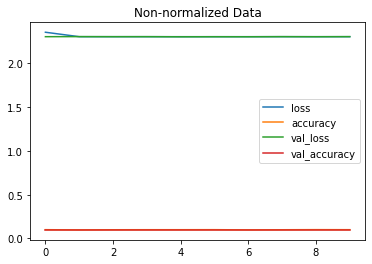

In [18]:
# Compairing loss curves between both datas.
import pandas as pd
pd.DataFrame(history.history).plot(title = "Non-normalized Data")

<Axes: title={'center': 'Normalized Data'}>

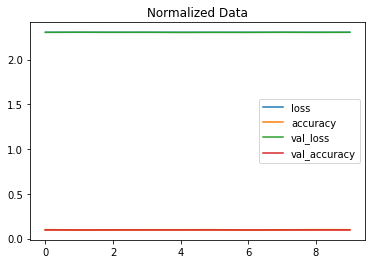

In [19]:
pd.DataFrame(norm_history.history).plot(title = "Normalized Data")

## **Finding the ideal learning rate**


In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_12 = model_12.fit(train_data_norm, train_labels, epochs = 40, callbacks = [lr_schedular])

<Axes: title={'center': 'Normalized Data'}>

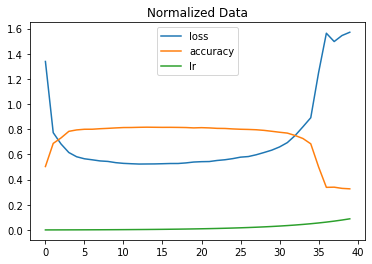

In [32]:
pd.DataFrame(history_12.history).plot(title = "Normalized Data")

Text(0.5, 1.0, 'Finding Ideal Learning Rate')

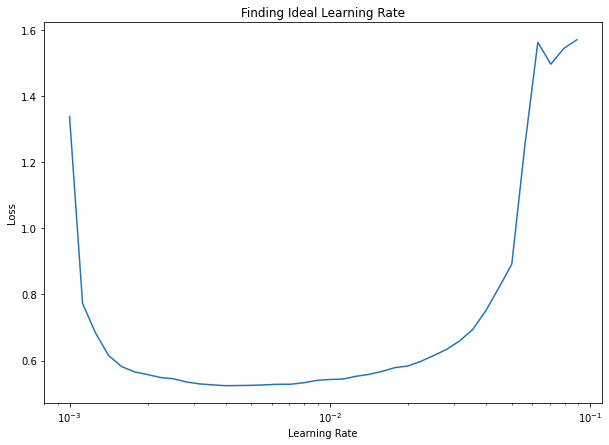

In [33]:
# Plotting learning rate decay curve.
lrs = 1e-3 * 10**(tf.range(40)/20) # these are the learning rate values changing every epoch.
lrs
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_12.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate")

In [34]:
# Looks like this is our ideal learning rate.
10**-3

0.001

In [14]:
# Lets rebuild our model with this ideal learning rate.
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ["accuracy"])

In [15]:
history_13 = model_13.fit(train_data_norm, train_labels, epochs = 20, validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 11s 3ms/step - loss: 1.2564 - accuracy: 0.5341 - val_loss: 0.9241 - val_accuracy: 0.6636
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7754 - accuracy: 0.7403 - val_loss: 0.6862 - val_accuracy: 0.7763
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5975 - accuracy: 0.8024 - val_loss: 0.5925 - val_accuracy: 0.8001
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5447 - accuracy: 0.8175 - val_loss: 0.5603 - val_accuracy: 0.8097
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5248 - accuracy: 0.8232 - val_loss: 0.5647 - val_accuracy: 0.8042
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5118 - accuracy: 0.8276 - val_loss: 0.5611 - val_accuracy: 0.8064
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5038 - accuracy: 0.8301 - val_loss: 0.5430 - val_accuracy

<Axes: title={'center': 'Normalized Data'}>

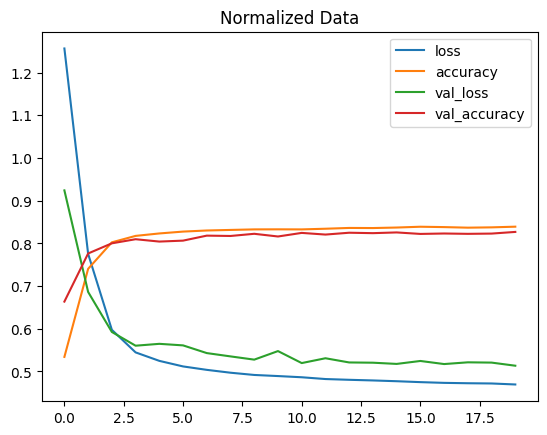

In [17]:
import pandas as pd
pd.DataFrame(history_13.history).plot(title = "Normalized Data")

## **Evaluating multi-clas classification model**

1. Evaluate performance by using other classification metrics.
2. Assess predictions through visualization.
3. Improve results by traing it for longer or changing its architecture.
4. Save the model for future.

In [21]:
# Get predictions and converting it to binary.
y_preds = model_13.predict(test_data_norm)
predictions = tf.round(y_preds)
predictions[:5], test_labels.min(), test_labels.max(), y_preds[:5]
# Outputs are prediction probabilities.

313/313 [==============================] - 1s 2ms/step


(<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)>,
 0,
 9,
 array([[1.32411107e-04, 6.39031634e-13, 1.89029691e-07, 6.49864589e-08,
         1.13944210e-09, 3.79387349e-01, 3.49433321e-05, 3.78344618e-02,
         3.58696925e-05, 5.82574725e-01],
        [3.14369658e-03, 4.44909938e-06, 6.63197577e-01, 3.57881712e-04,
         6.57324195e-02, 6.84467319e-21, 2.67563581e-01, 0.00000000e+00,
         3.75122767e-07, 2.03997971e-24],
        [1.35492257e-04, 9.97245908e-01, 1.89784204e-03, 6.46828441e-04,
         5.83897599e-05, 1.73909689e-11, 1.55162070e-05, 4.67689156e-29,
         3.71986414e-10, 3.65478372e-13],
        [2.30671267e-05, 9.99527097e-01, 8.63277965e-05, 3.60962702e-04,
         1.84972464e-06, 9.32520120e-

In [22]:
# Converting our probabilities into integers.
y_preds = y_preds.argmax(axis = 1)
y_preds

array([9, 2, 1, ..., 8, 1, 5])

In [25]:
# test_labels min = 0 and max = 9, we need to convert it into ninary but before we nned to make sure we bring these numbers on the range of 0 to 1.
# Therefore, we divide every number by the max value (9).
test_labels_modi = test_labels / 9
test_labels_binary = tf.round(test_labels_modi)
test_labels_binary, test_labels_modi

(<tf.Tensor: shape=(10000,), dtype=float64, numpy=array([1., 0., 0., ..., 1., 0., 1.])>,
 array([1.        , 0.22222222, 0.11111111, ..., 0.88888889, 0.11111111,
        0.55555556]))

In [27]:
# Prettifing confusion matrix.
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes = None, figsize = (30, 30), text_size = 15):

  # Create a confusion matrix.
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # Normalize our confusion matrix.
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot.
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Set lables to be classes.
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Create lables.
  ax.set(title = "Confusion Matrix",
        xlabel = "Prediction Label",
        ylabel = "True Lable",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set x-axis labels to bottom.
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the label size.
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors.
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i, j] > threshold else "black",
            size = text_size)

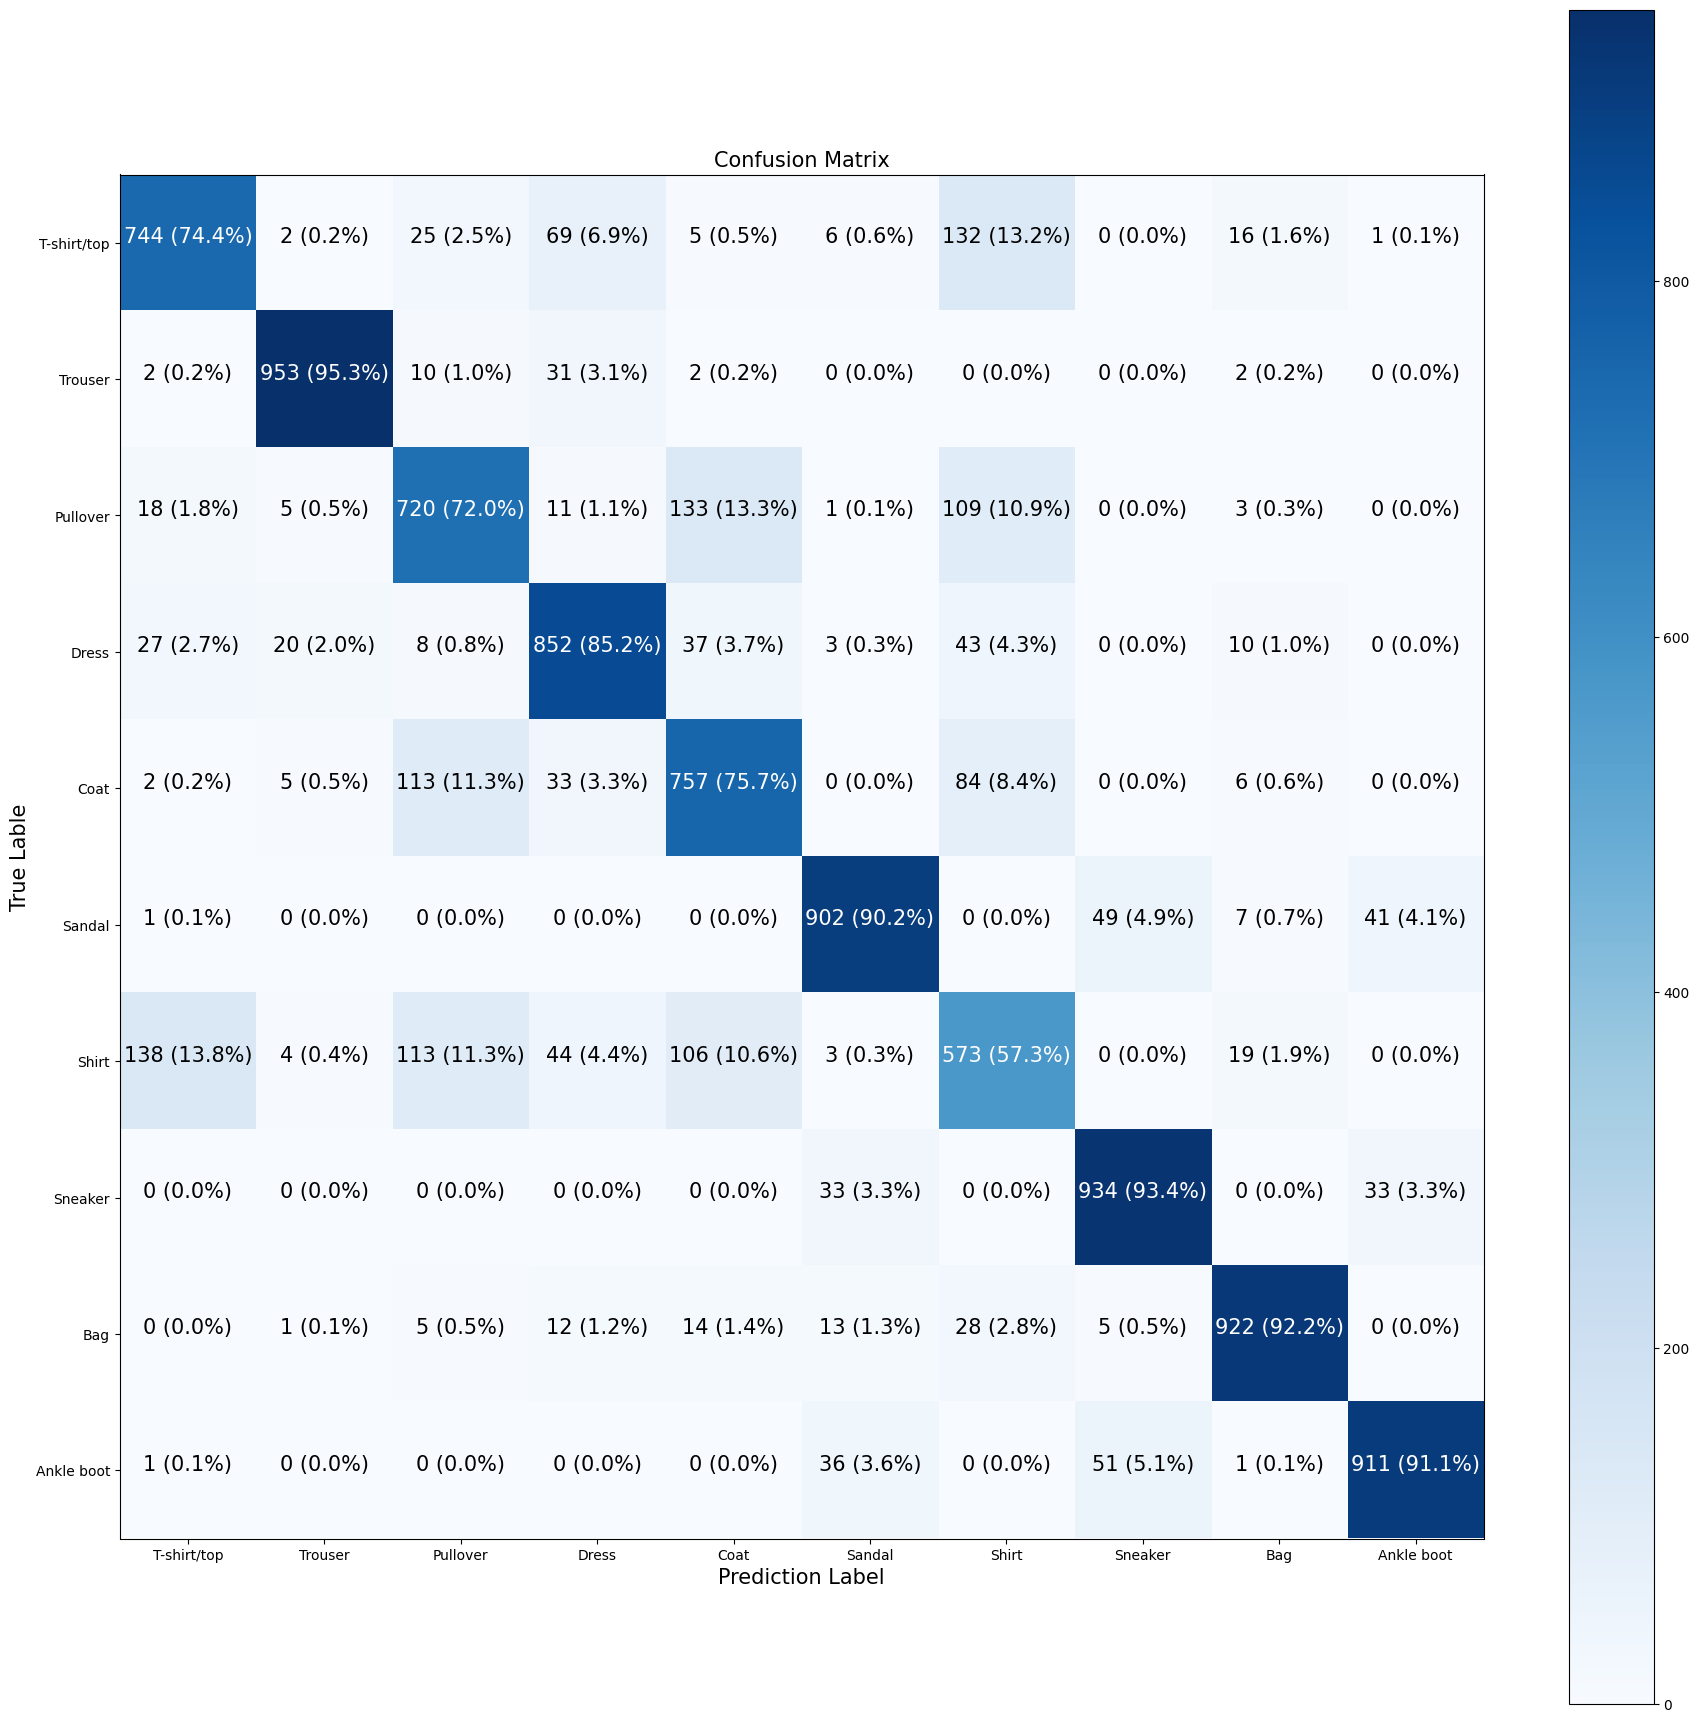

In [32]:
plot_confusion_matrix(test_labels, y_preds, class_names, figsize = (22, 22), text_size = 15)

In [36]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks aa random image and predicts it and also displays its true label.
  """
  # Settingup random integer
  i = random.randint(0, len(images))

  # Create predictions at targets.
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_labels = classes[pred_probs.argmax()]
  true_labels = classes[true_labels[i]]

  #Plot image.
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the color of titles depending on the prediction being right or wrong.
  if pred_labels == true_labels:
    color = "green"
  else:
    color = "red"

  # xlabel info. (prediction/true_labels)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_labels, 100*tf.reduce_max(pred_probs), true_labels), color = color)


1/1 [==============================] - 0s 19ms/step


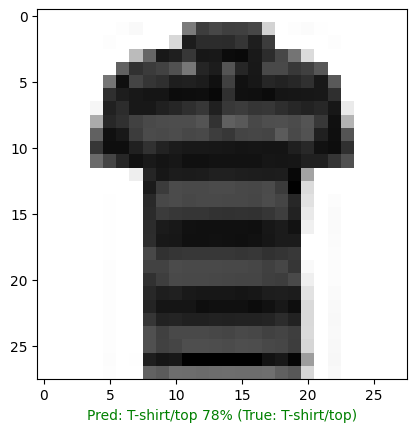

In [53]:
plot_random_image(model_13, test_data_norm, test_labels, class_names)

## **What patterns model is learning!**

In [56]:
# Layers
model_13.layers

In [57]:
# Extract a particular layer.
model_13.layers[1]

In [63]:
# Get patterns in the layer.
weights, biases = model_13.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.56148756, -0.6486412 ,  0.6224445 ,  0.7534317 ],
        [ 0.34171426, -1.2905786 ,  0.92998034,  1.3187907 ],
        [-0.24558547, -0.32291582,  0.6256493 ,  0.50936264],
        ...,
        [ 0.22506258,  0.1082406 ,  0.37013936, -0.13627423],
        [-0.33478743, -0.13305148,  0.42317107, -0.91238004],
        [ 0.7930187 , -0.1682545 ,  0.5285115 , -0.6606915 ]],
       dtype=float32),
 (784, 4))

In [65]:
biases, biases.shape

(array([1.1665131, 1.0865467, 1.4276084, 1.3317775], dtype=float32), (4,))

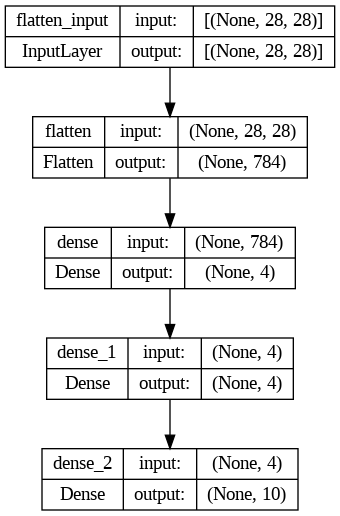

In [66]:
from tensorflow.keras.utils import plot_model
plot_model(model_13, show_shapes = True)